<font size = "6">**경기도 코로나19 발생동향 분석하기** </font><br><br>
데이터 출처 : 경기도감염병관리지원단 (http://www.gidcc.or.kr)

In [2]:
# pandas, numpy 라이브러리 로드하기
import pandas as pd
import numpy as np

In [4]:
# file_name 변수에 다운받은 파일명 저장
file_name = f"gg_covid.csv"
file_name

'gg_covid.csv'

In [408]:
# read_csv 로 csv 파일 불러오기
df = pd.read_csv(file_name)
df.shape

(20336, 29)

In [341]:
# head 로 미리보기를 합니다.
df.head().columns

Index(['"전체"', '성별', '기준일(발병일, 확진일 선택)', '지역 + 시 ', '무증상/조사중',
       '필터(무증상,조사중 제외)', 'GRP', '감염경로', '감염경로 (그룹)', '경기번호', '구분', '구분2',
       '나이(만)', '무증상/조사중 기준일', '연령대', '연령대별 비율', '연번', '재검출', '증상발현일', '지역',
       '지역 (group)', '필터(무증상,조사중 제외)(복사본)', '확진일-증상발현일', '확진일-증상발현일_무증상조사중포함',
       '확진일자', '확진자', '레코드 수', '무증상자수', '최종_무증상자수'],
      dtype='object')

In [342]:
df.head()

,"""전체""",성별,"기준일(발병일, 확진일 선택)",지역 + 시,무증상/조사중,"필터(무증상,조사중 제외)",GRP,감염경로,감염경로 (그룹),경기번호,...,지역,지역 (group),"필터(무증상,조사중 제외)(복사본)",확진일-증상발현일,확진일-증상발현일_무증상조사중포함,확진일자,확진자,레코드 수,무증상자수,최종_무증상자수
0,전체,M,2020. 1. 26.,고양시,,참,grp01,해외유입,해외유입,고양-1,...,고양일산서,고양,참,4,4일,2020. 1. 26.,3,1,0,0
1,전체,M,2020. 1. 27.,평택시,,참,grp02,해외유입,해외유입,평택-1,...,평택,평택,참,2,2일,2020. 1. 27.,4,1,0,0
2,전체,M,2020. 2. 1.,부천시,,참,grp03,해외유입,해외유입,부천-1,...,부천,부천,참,12,12일,2020. 2. 1.,12,1,0,0
3,전체,F,2020. 2. 2.,부천시,,참,grp03,해외유입,해외유입,부천-2,...,부천,부천,참,4,4일,2020. 2. 2.,14,1,0,0
4,전체,M,2020. 2. 5.,수원시,,참,grp04,해외유입,해외유입,수원-1,...,수원장안,수원,참,4,4일,2020. 2. 5.,15,1,0,0


In [409]:
# 분석에 필요한 행만 남기기
df = df.drop(['"전체"', '기준일(발병일, 확진일 선택)', '지역 + 시 ','필터(무증상,조사중 제외)', 'GRP', '감염경로 (그룹)',
              '경기번호', '구분2', '무증상/조사중 기준일', '연령대별 비율', '연번', '증상발현일', '필터(무증상,조사중 제외)(복사본)',
              '확진일-증상발현일_무증상조사중포함', '확진자', '레코드 수', '무증상자수', '최종_무증상자수'], axis = 1)

In [410]:
# 최근 확진일자 순으로 정렬
df = df.sort_values("확진일자", ascending = False).reset_index(drop = True)
df.head()

,성별,무증상/조사중,감염경로,구분,나이(만),연령대,재검출,지역,지역 (group),확진일-증상발현일,확진일자
0,M,,불명확,NaN,52,50,,의정부,의정부,2,2021. 2. 4.
1,M,,불명확,NaN,78,70,,의정부,의정부,2,2021. 2. 4.
2,F,,불명확,NaN,52,50,,수원권선,수원,3,2021. 2. 4.
3,F,,불명확,NaN,64,60,,성남분당,성남,6,2021. 2. 4.
4,F,,불명확,NaN,54,50,,안산단원,안산,5,2021. 2. 4.


## 시각화 도구 불러오기

In [345]:
# matplotlib.pyplot 한글폰트 설정
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)

# 시각화 선명하게 설정하기
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 확진일

In [412]:
# 어느 날짜에 가장 많이 확진이 되었는지 확인
df["확진일자"].value_counts().head()

2020. 12. 15.    411
2020. 12. 22.    330
2021. 1. 6.      323
2020. 12. 11.    309
2020. 12. 14.    304
Name: 확진일자, dtype: int64

In [413]:
# "확진일자" 컬럼 object -> datetime 형태로 변환
df["확진일자"].head()
df["확진일자"] = pd.to_datetime(df["확진일자"])
df["확진일자"].describe()

<ipython-input-413-a7016af39815>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["확진일자"].describe()


count                   20336
unique                    355
top       2020-12-15 00:00:00
freq                      411
first     2020-01-26 00:00:00
last      2021-02-04 00:00:00
Name: 확진일자, dtype: object

In [414]:
# 판다스 dt함수로 월, 일, 주, 요일 추출
# 월~일 : 0~6
df["월"] = df["확진일자"].astype(str).str[:7]
df["일"] = df["확진일자"].dt.day
df["주"] = df["확진일자"].dt.isocalendar().week
df["요일"] = df["확진일자"].dt.dayofweek
df

,성별,무증상/조사중,감염경로,구분,나이(만),연령대,재검출,지역,지역 (group),확진일-증상발현일,확진일자,월,일,주,요일
0,M,,불명확,NaN,52,50,,의정부,의정부,2,2021-02-04,2021-02,4,5,3
1,M,,불명확,NaN,78,70,,의정부,의정부,2,2021-02-04,2021-02,4,5,3
2,F,,불명확,NaN,52,50,,수원권선,수원,3,2021-02-04,2021-02,4,5,3
3,F,,불명확,NaN,64,60,,성남분당,성남,6,2021-02-04,2021-02,4,5,3
4,F,,불명확,NaN,54,50,,안산단원,안산,5,2021-02-04,2021-02,4,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20331,M,무증상,불명확,접촉자,72,70,,안양만안,안양,-,2020-10-01,2020-10,1,40,3
20332,M,,불명확,접촉자,16,10,,용인수지,용인,5,2020-10-01,2020-10,1,40,3
20333,F,무증상,불명확,접촉자,16,10,,용인수지,용인,-,2020-10-01,2020-10,1,40,3
20334,M,,해외유입,Primary,55,50,,평택,평택,2,2020-01-27,2020-01,27,5,0


In [415]:
# 2021년 "주" count는 2020년에서 이어서 진행
df.loc[df["확진일자"] > "2021-01-03", "주"] = df["주"]+53

In [416]:
df.loc[df["확진일자"]=="2020-12-31"].head(1)

,성별,무증상/조사중,감염경로,구분,나이(만),연령대,재검출,지역,지역 (group),확진일-증상발현일,확진일자,월,일,주,요일
11093,M,무증상,불명확,NaN,89,80,,평택안중,평택,-,2020-12-31,2020-12,31,53,3


In [417]:
df.loc[df["확진일자"]=="2021-01-03"].head(1)

,성별,무증상/조사중,감염경로,구분,나이(만),연령대,재검출,지역,지역 (group),확진일-증상발현일,확진일자,월,일,주,요일
2110,M,무증상,불명확,NaN,44,40,,화성,화성,-,2021-01-03,2021-01,3,53,6


In [418]:
df.loc[df["확진일자"]=="2021-01-04"].head(1)

,성별,무증상/조사중,감염경로,구분,나이(만),연령대,재검출,지역,지역 (group),확진일-증상발현일,확진일자,월,일,주,요일
1671,F,,불명확,NaN,77,70,,용인기흥,용인,6,2021-01-04,2021-01,4,54,0


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

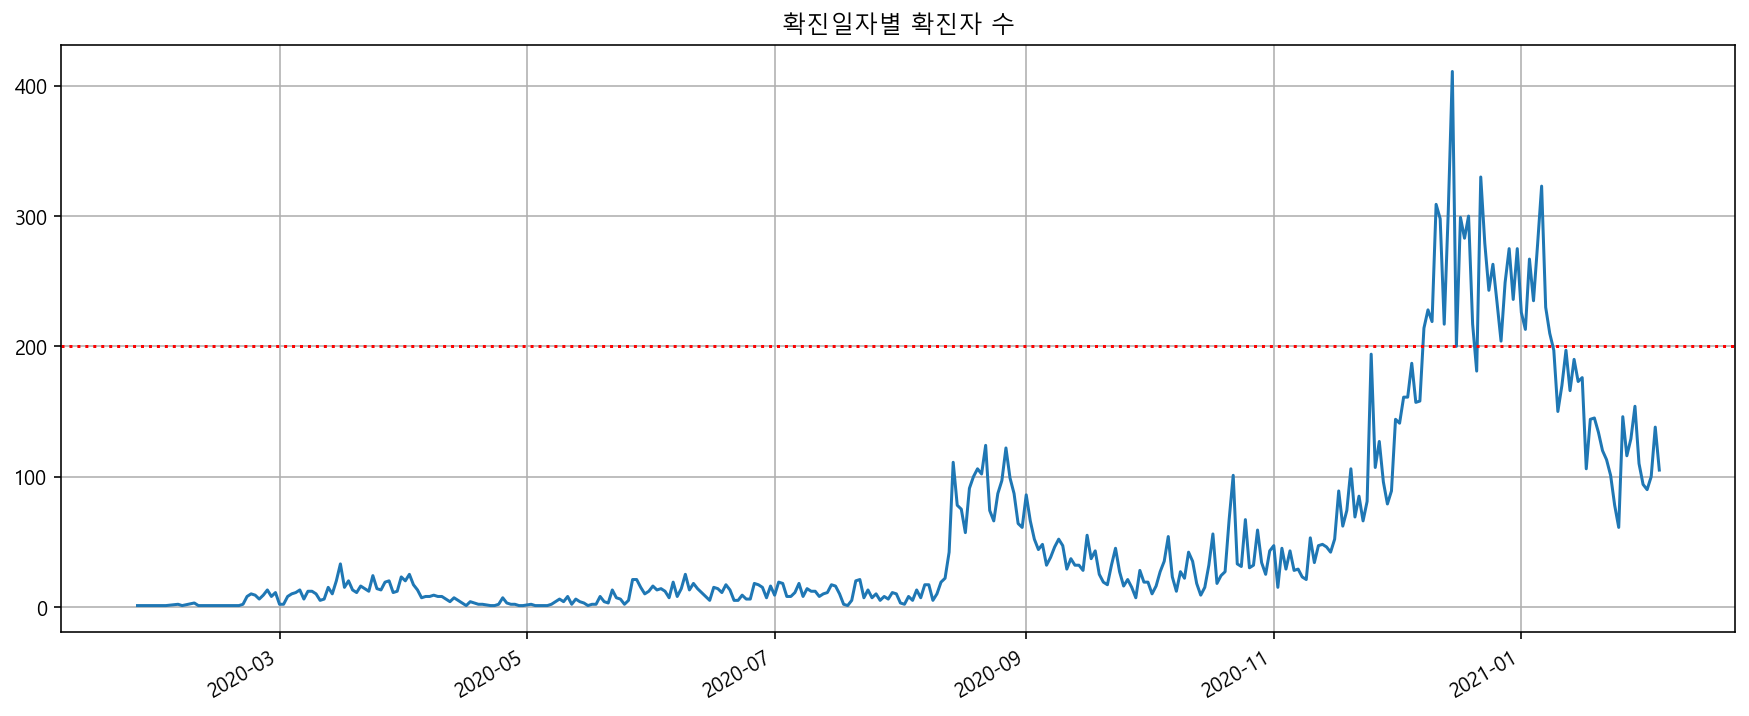

In [443]:
# 확진일자별 확진자 수 선그래프 그리고 200명 기준 빨간 기준선 표시
day_count = df["확진일자"].value_counts()
day_count.plot(title = "확진일자별 확진자 수", figsize = (15, 6), grid = True)
plt.axhline(200, color = "red", linestyle = ":")

### 확진자가 가장 많이 나온 날

In [354]:
# describe를 통해 요약
df["확진일자"].describe()

<ipython-input-354-d6eeefe7b151>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["확진일자"].describe()


count                   20336
unique                    355
top       2020-12-15 00:00:00
freq                      411
first     2020-01-26 00:00:00
last      2021-02-04 00:00:00
Name: 확진일자, dtype: object

In [355]:
# 일일 최대 확진자수
day_count.max()

411

In [419]:
# 확진자가 가장 많았던 날의 데이터 확인
df_most = df[df["확진일자"] == df["확진일자"].describe()["top"]]
df_most

<ipython-input-419-4701d89b3dac>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_most = df[df["확진일자"] == df["확진일자"].describe()["top"]]


,성별,무증상/조사중,감염경로,구분,나이(만),연령대,재검출,지역,지역 (group),확진일-증상발현일,확진일자,월,일,주,요일
15463,M,무증상,불명확,NaN,7,0,,오산,오산,-,2020-12-15,2020-12,15,51,1
15464,M,무증상,불명확,NaN,9,0,,안양동안,안양,-,2020-12-15,2020-12,15,51,1
15465,F,,불명확,NaN,48,40,,안양만안,안양,4,2020-12-15,2020-12,15,51,1
15466,M,,불명확,NaN,56,50,,시흥,시흥,5,2020-12-15,2020-12,15,51,1
15467,M,,불명확,NaN,44,40,,구리,구리,1,2020-12-15,2020-12,15,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15869,M,무증상,불명확,NaN,42,40,,안양만안,안양,-,2020-12-15,2020-12,15,51,1
15870,M,,불명확,NaN,87,80,,안양동안,안양,7,2020-12-15,2020-12,15,51,1
15871,F,,불명확,NaN,60,60,,안양만안,안양,3,2020-12-15,2020-12,15,51,1
15872,F,무증상,불명확,NaN,5,0,,화성,화성,-,2020-12-15,2020-12,15,51,1


In [420]:
# 확진자가 가장 많았던 날의 발생이력 확인
df_most["감염경로"].unique()

array(['불명확', '해외유입'], dtype=object)

### 막대그래프 그리기

<AxesSubplot:>

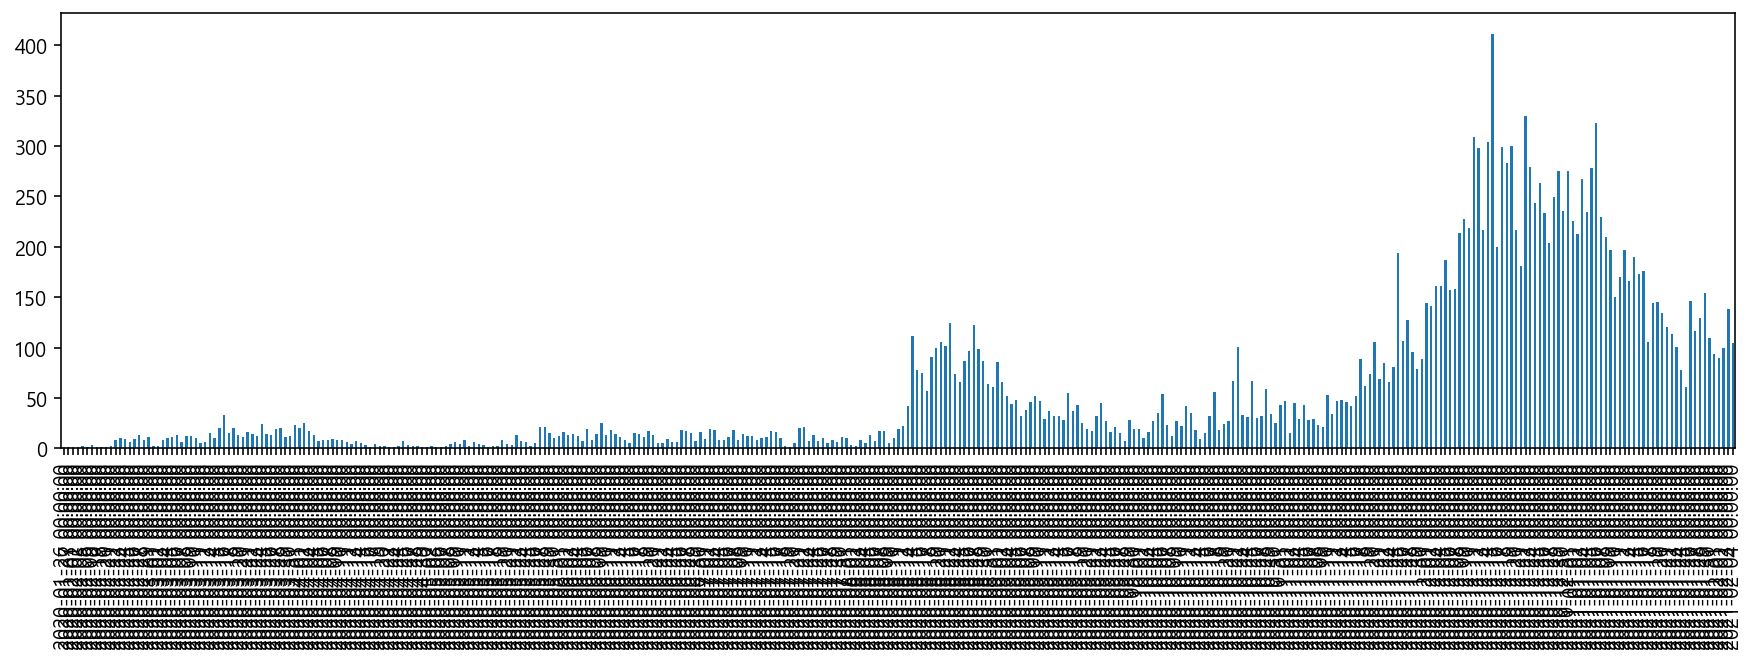

In [358]:
# 일자별 확진자수 막대그래프로 확인
day_count = df["확진일자"].value_counts().sort_index()
day_count.plot.bar(figsize = (15,4))

### 최근 데이터만 슬라이싱으로 나눠 그리기

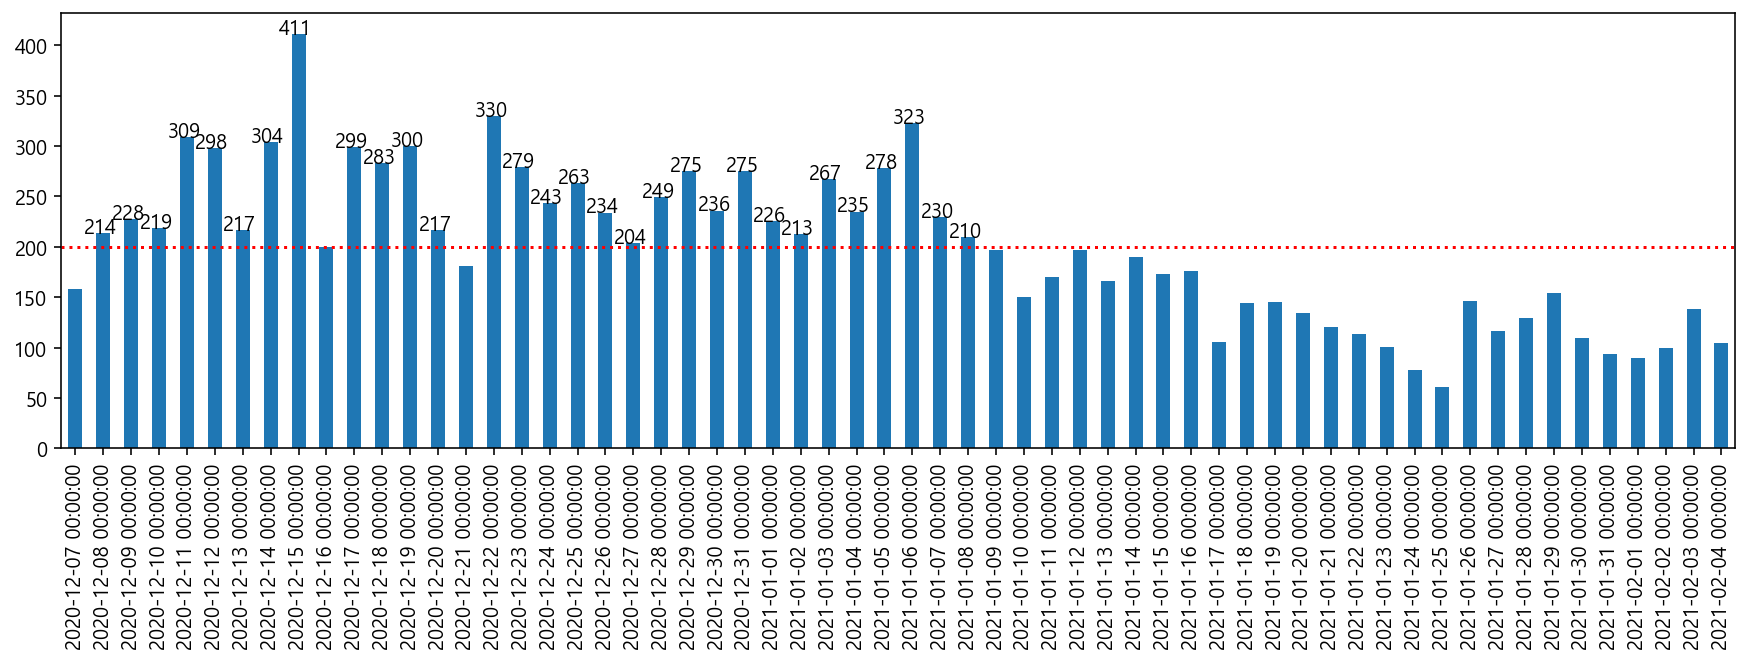

In [359]:
# 슬라이싱을 통해 최근 60일간의 데이터 확인
# 확진자수 200명 기준 기준선 표시, 확진자수 숫자로 표시
# 12월 확진자 수가 상대적으로 많았음을 확인할 수 있음

g = day_count[-60:].plot.bar(figsize = (15,4), rot = 90)
g.axhline(200, linestyle = ":", color = "red")

for i in range(60):
    case_count = day_count[-60:].iloc[i]
    if case_count > 200:
        g.text(x = i-0.7, y = case_count, s = case_count)

### 월별 확진자 수 그리기

In [360]:
df["확진일자"].astype(str).str[:7]

0        2021-02
1        2021-02
2        2021-02
3        2021-02
4        2021-02
          ...   
20331    2020-10
20332    2020-10
20333    2020-10
20334    2020-01
20335    2020-01
Name: 확진일자, Length: 20336, dtype: object

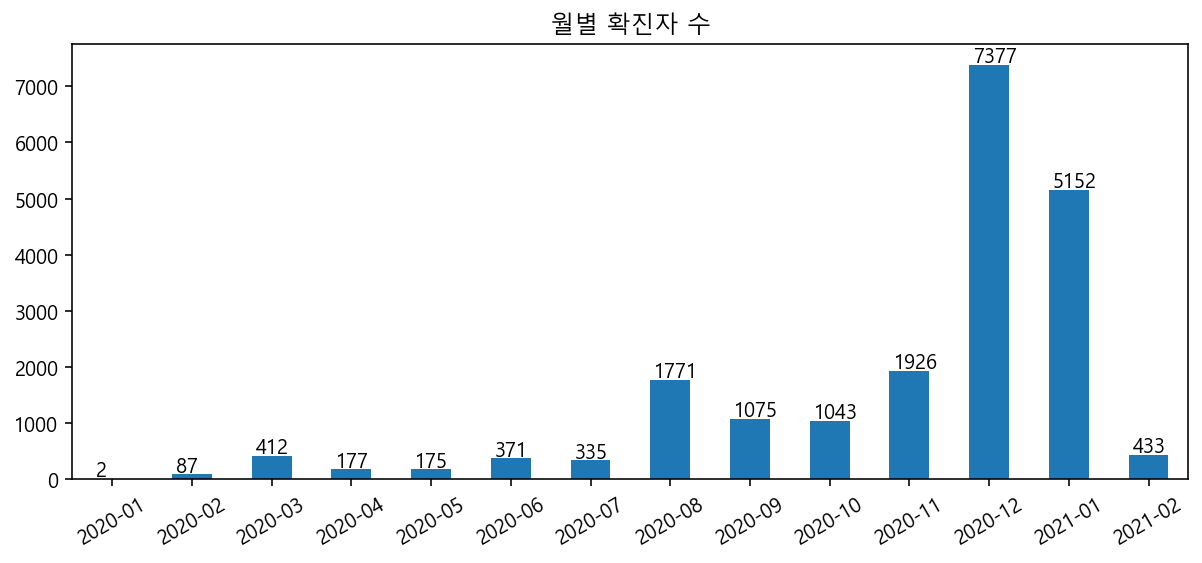

In [361]:
# 월별 확진자수 막대그래프로 표현하기
month_case = df["확진일자"].astype(str).str[:7].value_counts().sort_index()
g = month_case.plot.bar(rot = 30, figsize = (10, 4), title = "월별 확진자 수")

# 월별 확진자수 텍스트 표시
for i in range(len(month_case)):
    g.text(x = i-0.2, y = month_case.iloc[i]+50, s = month_case.iloc[i])

<AxesSubplot:title={'center':'월별 확진자 수'}>

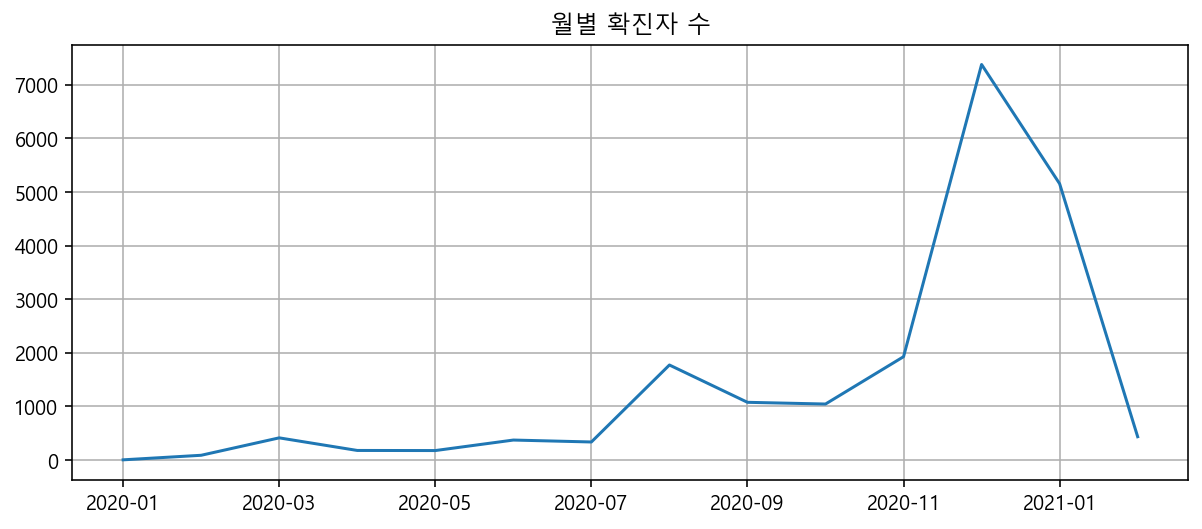

In [362]:
# 선그래프로 표현하기
month_case.plot(title = "월별 확진자 수", figsize = (10, 4), grid = True)

### 주별 확진자수 그리기

<AxesSubplot:title={'center':'주별 확진자 수'}>

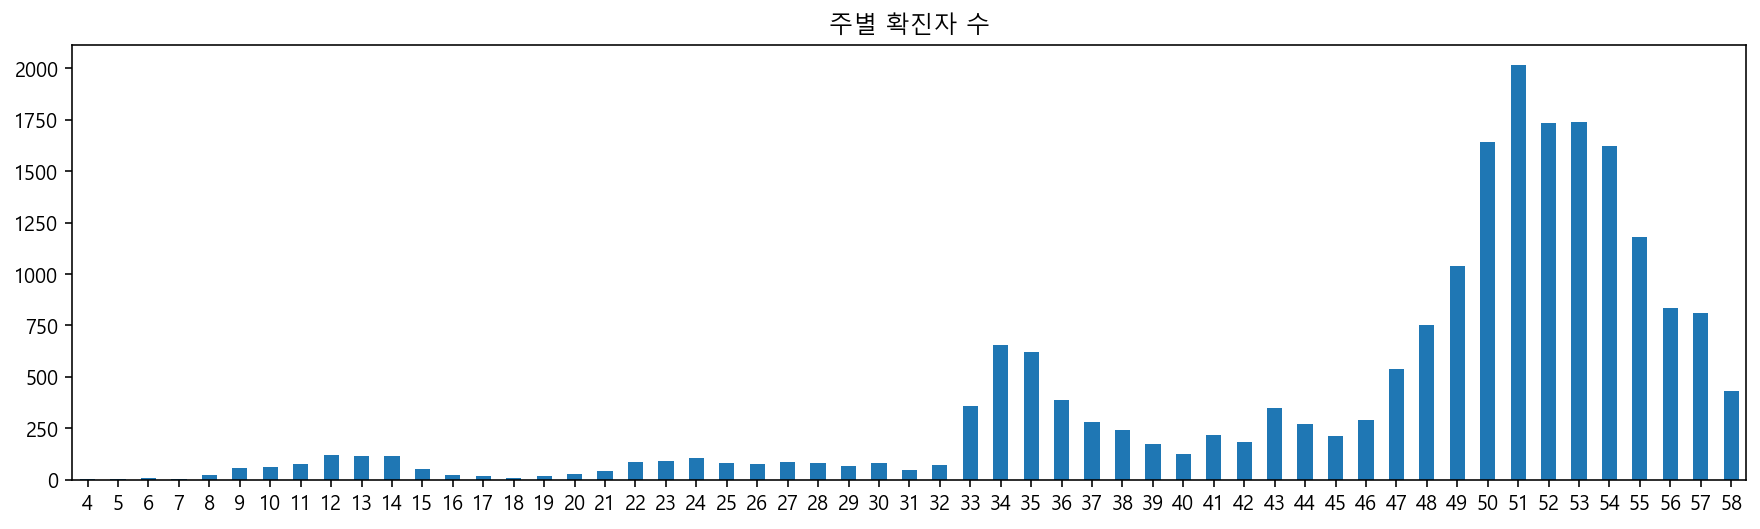

In [363]:
# 주별 확진자수 막대그래프로 표현하기
week_count = df["주"].value_counts().sort_index()
week_count.plot.bar(figsize = (15,4), rot = 0, title = "주별 확진자 수")

### 월-주 함께 그리기

In [364]:
month_week_count = df.groupby(["월", "주"])["성별"].count()
month_week_count

월        주 
2020-01  4        1
         5        1
2020-02  5        2
         6        6
         7        1
               ... 
2021-01  54    1623
         55    1178
         56     835
         57     810
2021-02  58     433
Name: 성별, Length: 66, dtype: int64

<AxesSubplot:xlabel='월,주'>

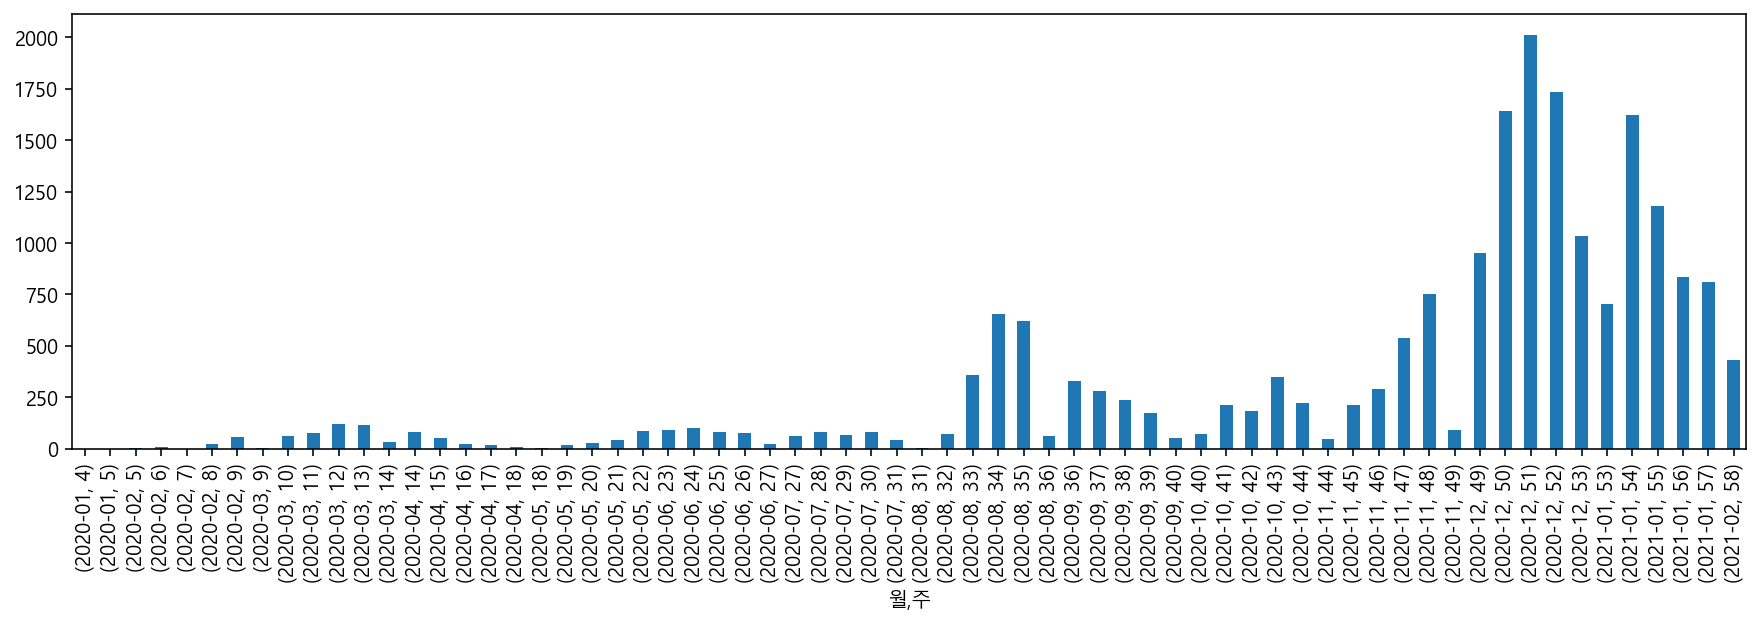

In [365]:
# x축 (월, 주) 멀티인덱스로 표시
month_week_count.plot.bar(figsize = (15, 4))

## 성별 및 연령대에 따른 확진추이

In [446]:
# 성별 분포 확인
gender_count = df.groupby(["성별"])["성별"].count()
gender_count

성별
F    10368
M     9968
Name: 성별, dtype: int64

In [455]:
month_case_gender = df.groupby(["월","성별"])["감염경로"].count().unstack().fillna(0).astype(int)
month_case_gender

성별,F,M
월,,
2020-01,0,2
2020-02,37,50
2020-03,239,173
2020-04,97,80
2020-05,72,103
2020-06,176,195
2020-07,125,210
2020-08,973,798
2020-09,520,555


<AxesSubplot:title={'center':'성별에 따른 월별 확진자 수'}, xlabel='월'>

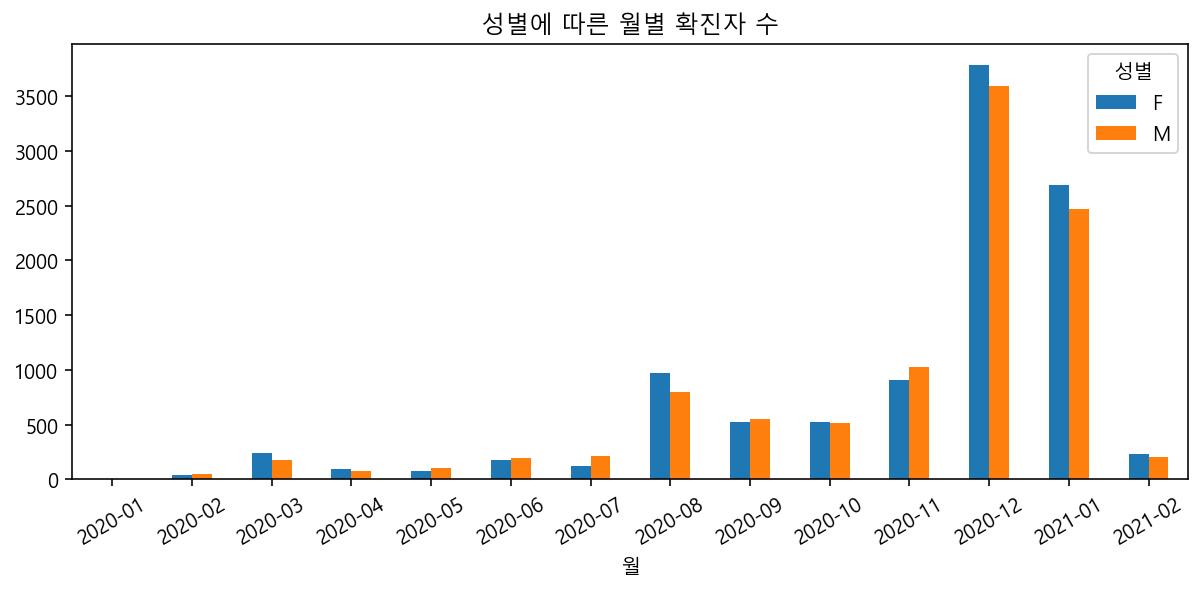

In [467]:
# 성별에 따른 월별 확진자수 막대그래프로 표현하기
month_case_gender.plot.bar(rot = 30, figsize = (10, 4), title = "성별에 따른 월별 확진자 수")

In [490]:
# 컬럼 순서 변경
ages = "0 10 20 30 40 50 60 70 80 90 100 110 120 조사중"
ages = ages.split()
ages

['0',
 '10',
 '20',
 '30',
 '40',
 '50',
 '60',
 '70',
 '80',
 '90',
 '100',
 '110',
 '120',
 '조사중']

<AxesSubplot:xlabel='연령대'>

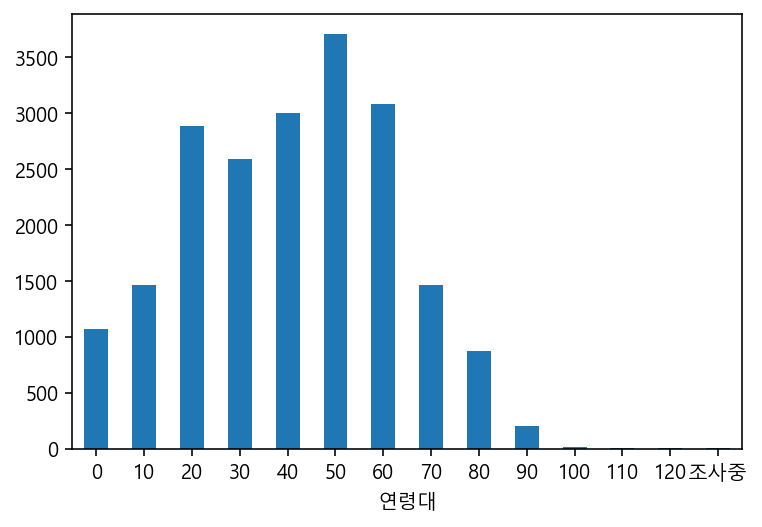

In [489]:
# 연령대 분포 확인
age_count = df.groupby(["연령대"])["연령대"].count()
age_count = age_count[ages]
age_count.plot.bar(rot = 0)

In [491]:
# 성별 및 연령대별 분포 확인
age_gender = df.groupby(["성별", "연령대"])["성별"].count().unstack().fillna(0).astype(int)
age_gender = age_gender[ages]
age_gender

연령대,0,10,20,30,40,50,60,70,80,90,100,110,120,조사중
성별,,,,,,,,,,,,,,
F,492,644,1272,1178,1542,2041,1666,782,576,165,10,0,0,0
M,573,821,1608,1409,1462,1662,1411,678,301,37,2,1,1,2


<AxesSubplot:title={'center':'성별 및 연령대별 확진자 수'}, xlabel='연령대'>

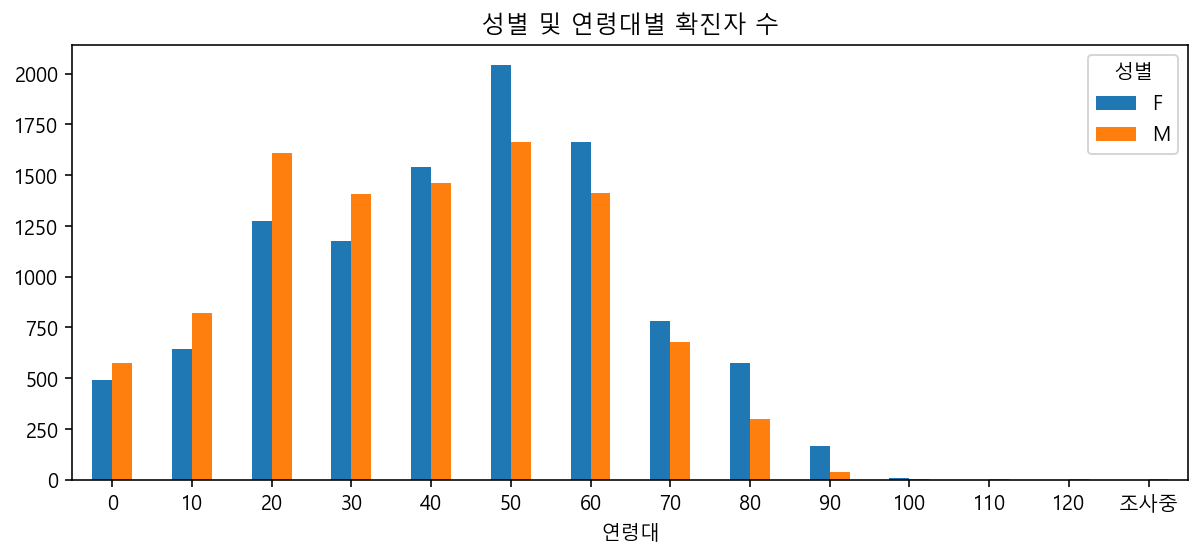

In [492]:
# 성별, 연령대에 따른 확진자수 막대그래프로 표현하기
age_gender.T.plot.bar(rot = 0, figsize = (10, 4), title = "성별 및 연령대별 확진자 수")

## 무증상 감염자

In [504]:
df["무증상/조사중"] = df["무증상/조사중"].str.strip()

In [515]:
df.loc[~((df["무증상/조사중"] == "무증상") | (df["무증상/조사중"] == "확인불가")), "무증상/조사중"] = "증상있음"

In [574]:
# 무증상 감염자 분포 확인
nosymp_count = df.groupby(["무증상/조사중", "연령대"])["성별"].count().unstack().fillna(0).astype(int)
nosymp_count = nosymp_count[ages]
nosymp_count.T.style.background_gradient(cmap = "Greens")
# nosymp_count = nosymp_count.to_frame()
# # nosymp_count.columns = ["인원수"]
# nosymp_count = nosymp_count.unstack().fillna(0).astype(int)
# nosymp_count

무증상/조사중,무증상,증상있음,확인불가
연령대,,,
0,625,436,4
10,593,868,4
20,946,1927,7
30,782,1795,10
40,917,2081,6
50,1179,2515,9
60,1038,2031,8
70,584,871,5
80,418,445,14


## 재확진자

In [594]:
reconfirmed_count = df[df["재검출"] != " "]
reconfirmed_count.head()

,성별,무증상/조사중,감염경로,구분,나이(만),연령대,재검출,지역,지역 (group),확진일-증상발현일,확진일자,월,일,주,요일
5654,F,증상있음,불명확,접촉자,40,40,10.11 재검출,의정부,의정부,10,2020-09-08,2020-09,8,37,1
5824,M,증상있음,불명확,Primary,35,30,10.27 재검출,이천,이천,3,2020-09-04,2020-09,4,36,4
6020,M,증상있음,불명확,접촉자,34,30,10.15 재검출,의정부,의정부,2,2020-09-24,2020-09,24,39,3
6129,F,증상있음,불명확,접촉자,26,20,10.12재검출,의정부,의정부,0,2020-09-20,2020-09,20,38,6
7263,M,무증상,해외유입,Primary,34,30,9.9 재검출,용인처인,용인,-,2020-08-25,2020-08,25,35,1


In [595]:
# 재확진자 49명 발생했음을 확인
reconfirmed_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 5654 to 19572
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   성별          49 non-null     object        
 1   무증상/조사중     49 non-null     object        
 2   감염경로        49 non-null     object        
 3   구분          49 non-null     object        
 4   나이(만)       49 non-null     object        
 5   연령대         49 non-null     object        
 6   재검출         49 non-null     object        
 7   지역          49 non-null     object        
 8   지역 (group)  49 non-null     object        
 9   확진일-증상발현일   49 non-null     object        
 10  확진일자        49 non-null     datetime64[ns]
 11  월           49 non-null     object        
 12  일           49 non-null     int64         
 13  주           49 non-null     UInt32        
 14  요일          49 non-null     int64         
dtypes: UInt32(1), datetime64[ns](1), int64(2), object(11)
memory usage: 6.

## 확진일 - 증상발현일

In [598]:
df.loc[df["확진일-증상발현일"] == '-', "확진일-증상발현일"] = "무증상"

In [599]:
df["확진일-증상발현일"].unique()

array(['2', '3', '6', '5', '무증상', '11', '0', '1', '4', '10', '7', '8',
       '14', '12', '15', '9', '16', '20', '31', '13', '28', '18', '21',
       '17', '19', '32', '30', '42', '24', '33', '22', '29', '23', '39',
       '47', '25', '27', '26', '38', '46'], dtype=object)

In [609]:
delay_count = df[df["확진일-증상발현일"] != '무증상']
delay_count

,성별,무증상/조사중,감염경로,구분,나이(만),연령대,재검출,지역,지역 (group),확진일-증상발현일,확진일자,월,일,주,요일
0,M,증상있음,불명확,NaN,52,50,,의정부,의정부,2,2021-02-04,2021-02,4,58,3
1,M,증상있음,불명확,NaN,78,70,,의정부,의정부,2,2021-02-04,2021-02,4,58,3
2,F,증상있음,불명확,NaN,52,50,,수원권선,수원,3,2021-02-04,2021-02,4,58,3
3,F,증상있음,불명확,NaN,64,60,,성남분당,성남,6,2021-02-04,2021-02,4,58,3
4,F,증상있음,불명확,NaN,54,50,,안산단원,안산,5,2021-02-04,2021-02,4,58,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20329,M,증상있음,불명확,primary,42,40,,동두천,동두천,7,2020-10-01,2020-10,1,40,3
20330,M,증상있음,불명확,접촉자,48,40,,용인수지,용인,0,2020-10-01,2020-10,1,40,3
20332,M,증상있음,불명확,접촉자,16,10,,용인수지,용인,5,2020-10-01,2020-10,1,40,3
20334,M,증상있음,해외유입,Primary,55,50,,평택,평택,2,2020-01-27,2020-01,27,5,0


<AxesSubplot:>

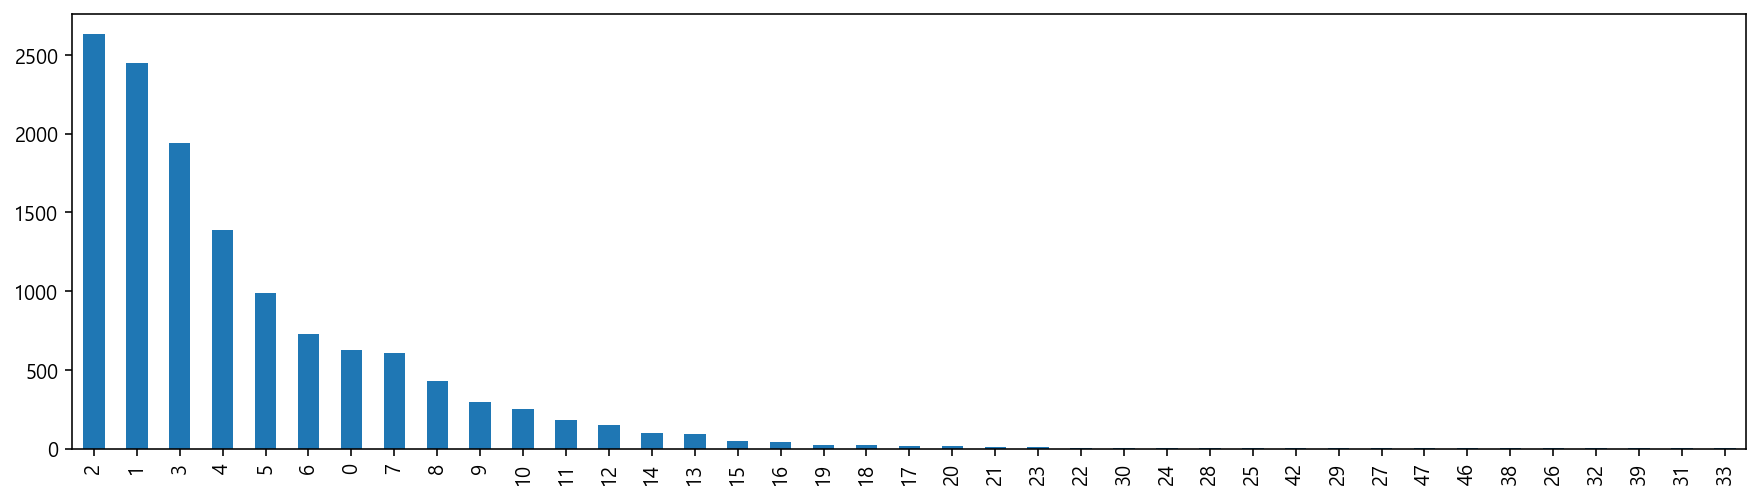

In [610]:
# 증상발현일과 확진일 간 일수 차이 확인
delay_count["확진일-증상발현일"].value_counts().plot.bar(figsize = (15, 4))

## 모든 날짜를 행에 만들어 주기


In [367]:
# 첫 확진일 부터 마지막 확진일까지 가져오기
first_day = df.iloc[-1]["확진일자"]
last_day = df.iloc[0]["확진일자"]
first_day, last_day

(Timestamp('2020-01-26 00:00:00'), Timestamp('2021-02-04 00:00:00'))

In [368]:
# 시작 날짜부터 끝나는 날짜까지 DatetimeIndex 만들고 days 라는 변수에 저장

days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04',
               ...
               '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-01-30', '2021-01-31', '2021-02-01', '2021-02-02',
               '2021-02-03', '2021-02-04'],
              dtype='datetime64[ns]', length=376, freq='D')

In [369]:
# days를 데이터프레임으로 만들기
df_days = days.to_frame(name = "연월일")
df_days

,연월일
2020-01-26,2020-01-26
2020-01-27,2020-01-27
2020-01-28,2020-01-28
2020-01-29,2020-01-29
2020-01-30,2020-01-30
...,...
2021-01-31,2021-01-31
2021-02-01,2021-02-01
2021-02-02,2021-02-02
2021-02-03,2021-02-03


In [370]:
# 확진일자별로 빈도수 구하고 데이터프레임으로 만들기
daily_case = df["확진일자"].value_counts().sort_index()
df_daily_case = daily_case.reset_index()
df_daily_case.columns = ["확진일자", "확진수"]
df_daily_case

,확진일자,확진수
0,2020-01-26,1
1,2020-01-27,1
2,2020-02-01,1
3,2020-02-02,1
4,2020-02-05,2
...,...,...
350,2021-01-31,94
351,2021-02-01,90
352,2021-02-02,100
353,2021-02-03,138


### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [371]:
# df_days와 df_daily_case 합치기
all_day = df_days.merge(df_daily_case, left_on = df_days.index, right_on = "확진일자", how = "left")
all_day = all_day.drop("연월일", axis = 1)
all_day

,확진일자,확진수
0,2020-01-26,1.0
1,2020-01-27,1.0
2,2020-01-28,NaN
3,2020-01-29,NaN
4,2020-01-30,NaN
...,...,...
371,2021-01-31,94.0
372,2021-02-01,90.0
373,2021-02-02,100.0
374,2021-02-03,138.0


## 누적 확진자 수 구하기

In [372]:
# 결측치 0으로 채우기
all_day = all_day.fillna(0)
all_day

,확진일자,확진수
0,2020-01-26,1.0
1,2020-01-27,1.0
2,2020-01-28,0.0
3,2020-01-29,0.0
4,2020-01-30,0.0
...,...,...
371,2021-01-31,94.0
372,2021-02-01,90.0
373,2021-02-02,100.0
374,2021-02-03,138.0


In [373]:
# "확진수", "누적확진" 컬럼 만들기
all_day["누적확진"] = all_day["확진수"].cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-26,1.0,1.0
1,2020-01-27,1.0,2.0
2,2020-01-28,0.0,2.0
3,2020-01-29,0.0,2.0
4,2020-01-30,0.0,2.0
...,...,...,...
371,2021-01-31,94.0,19903.0
372,2021-02-01,90.0,19993.0
373,2021-02-02,100.0,20093.0
374,2021-02-03,138.0,20231.0


### 데이터프레임으로 그리기

<AxesSubplot:title={'center':'확진수와 누적확진수'}, xlabel='확진일자'>

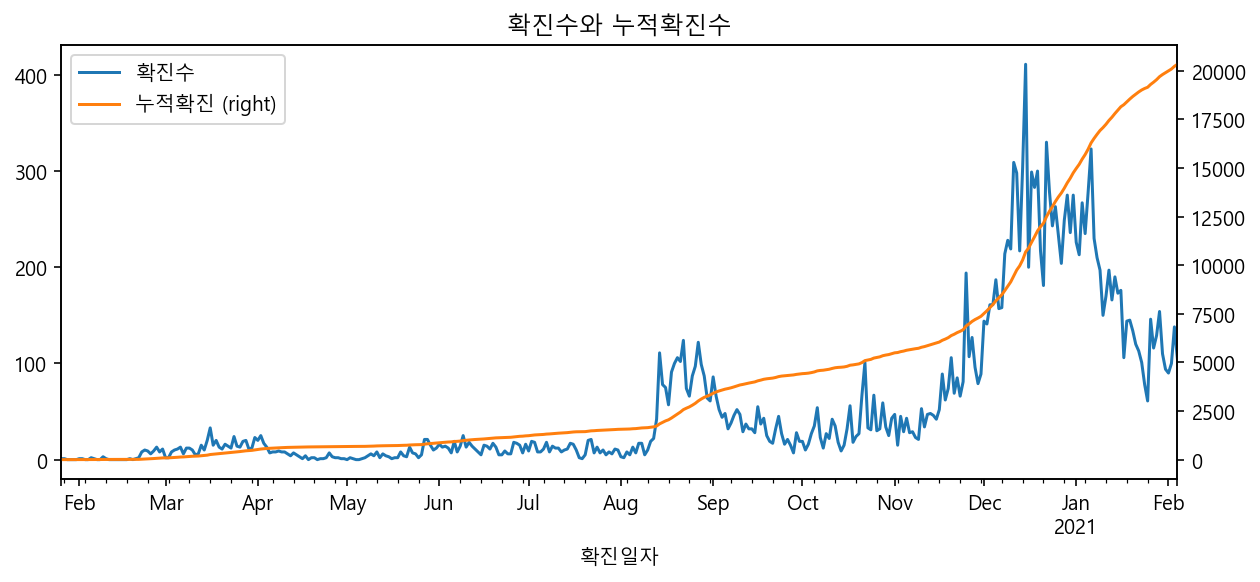

In [374]:
# 확진수와 누적확진 선그래프로 그리기
# x축에 들어갈 값을 set_index로 지정, secondary_y로 y축 스케일 추가해줌
all_day.set_index("확진일자")[["확진수", "누적확진"]].plot(figsize=(10,4),
                                                title = "확진수와 누적확진수",
                                                secondary_y = "누적확진")

## 확진월과 요일 구하기

In [379]:
df_all_day = all_day.reset_index()
df_all_day["월"] = df_all_day["확진일자"].astype(str).str[:7]
df_all_day["요일"] = df_all_day["확진일자"].dt.dayofweek
df_all_day

,확진일자,확진수,누적확진,월,요일
0,2020-01-26,1.0,1.0,2020-01,6
1,2020-01-27,1.0,2.0,2020-01,0
2,2020-01-28,0.0,2.0,2020-01,1
3,2020-01-29,0.0,2.0,2020-01,2
4,2020-01-30,0.0,2.0,2020-01,3
...,...,...,...,...,...
371,2021-01-31,94.0,19903.0,2021-01,6
372,2021-02-01,90.0,19993.0,2021-02,0
373,2021-02-02,100.0,20093.0,2021-02,1
374,2021-02-03,138.0,20231.0,2021-02,2


In [380]:
df_all_day.groupby(["월", "요일"])["확진수"].sum()

월        요일
2020-01  0       1.0
         1       0.0
         2       0.0
         3       0.0
         4       0.0
               ...  
2021-01  6     695.0
2021-02  0      90.0
         1     100.0
         2     138.0
         3     105.0
Name: 확진수, Length: 94, dtype: float64

### 요일별 확진 수 

In [381]:
# 월별, 요일별 확진수 구하기
all_day_week = df_all_day.groupby(["월", "요일"])["확진수"].sum().unstack().fillna(0).astype(int)
all_day_week

요일,0,1,2,3,4,5,6
월,,,,,,,
2020-01,1,0,0,0,0,0,1
2020-02,10,7,11,15,10,20,14
2020-03,71,80,49,43,58,52,59
2020-04,19,15,34,36,31,26,16
2020-05,12,15,32,30,35,26,25
2020-06,47,78,47,47,56,60,36
2020-07,31,57,61,67,63,29,27
2020-08,202,202,232,277,329,309,220
2020-09,94,220,237,163,132,131,98


In [382]:
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [383]:
# 컬럼명을 숫자에서 요일명으로 변경
all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
월,,,,,,,
2020-01,1,0,0,0,0,0,1
2020-02,10,7,11,15,10,20,14
2020-03,71,80,49,43,58,52,59
2020-04,19,15,34,36,31,26,16
2020-05,12,15,32,30,35,26,25
2020-06,47,78,47,47,56,60,36
2020-07,31,57,61,67,63,29,27
2020-08,202,202,232,277,329,309,220
2020-09,94,220,237,163,132,131,98


In [384]:
# 히트맵으로 표현 : 월을 컬럼으로
all_day_week.astype(int).T.style.background_gradient(cmap = "Purples")

월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
월,1,10,71,19,12,47,31,202,94,124,243,892,610,90
화,0,7,80,15,15,78,57,202,220,131,268,1374,766,100
수,0,11,49,34,32,47,61,232,237,158,319,1084,739,138
목,0,15,43,36,30,47,67,277,163,181,271,1197,669,105
금,0,10,58,31,35,56,63,329,132,127,309,1016,876,0
토,0,20,52,26,26,60,29,309,131,168,240,1019,797,0
일,1,14,59,16,25,36,27,220,98,154,276,795,695,0


In [385]:
# 히트맵으로 표현 : 요일을 컬럼으로
all_day_week.astype(int).style.background_gradient(cmap = "Purples")

,월,화,수,목,금,토,일
월,,,,,,,
2020-01,1,0,0,0,0,0,1
2020-02,10,7,11,15,10,20,14
2020-03,71,80,49,43,58,52,59
2020-04,19,15,34,36,31,26,16
2020-05,12,15,32,30,35,26,25
2020-06,47,78,47,47,56,60,36
2020-07,31,57,61,67,63,29,27
2020-08,202,202,232,277,329,309,220
2020-09,94,220,237,163,132,131,98


## 거주지별 확진자

In [423]:
# 지역별 확진자 확인
city_count = df["지역 (group)"].value_counts()
city_count

고양     1854
성남     1648
부천     1551
용인     1452
평택     1294
수원     1280
안산     1041
남양주    1007
안양      989
의정부     871
김포      699
파주      657
화성      608
시흥      607
광주      595
군포      582
광명      571
구리      396
하남      344
양주      311
포천      300
오산      255
이천      235
양평      229
의왕      182
안성      173
여주      172
가평      125
연천      115
동두천     103
과천       90
Name: 지역 (group), dtype: int64

<AxesSubplot:title={'center':'지역별 확진자 수'}>

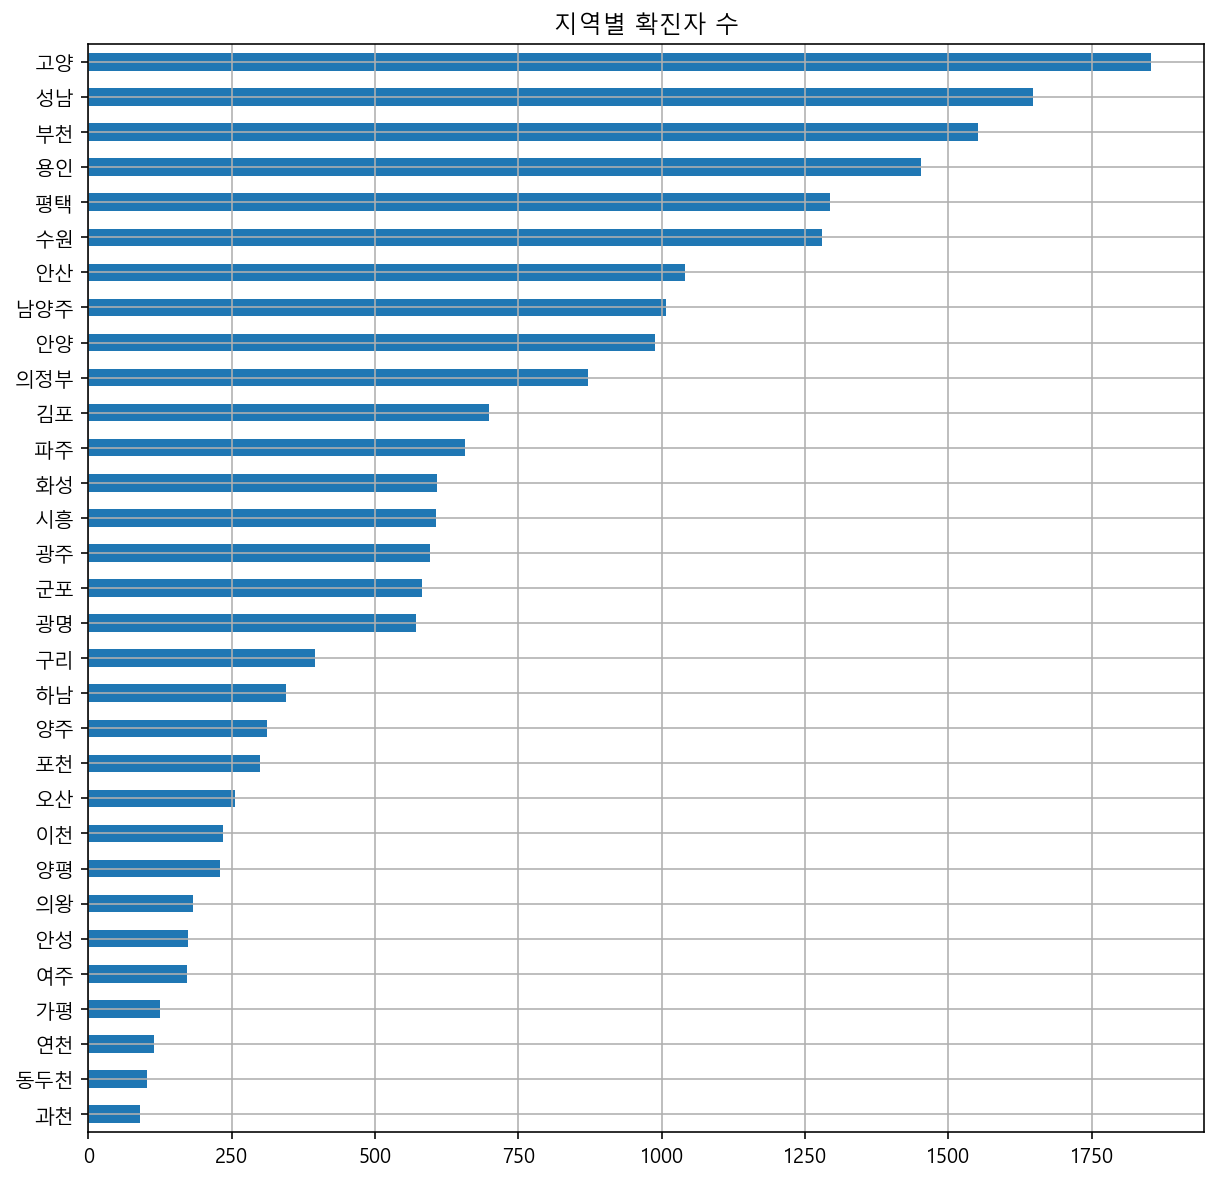

In [424]:
# 지역별 확진자수 시각화
city_count.sort_values().plot.barh(title = "지역별 확진자 수", figsize = (10, 10), grid = True)

In [425]:
# 구까지 표시된 지역만 추가로 시각화 ('지역'과 '지역(group)' 값이 다른 경우)
city_detail = df[df["지역 (group)"] != df["지역"]]
city_detail

,성별,무증상/조사중,감염경로,구분,나이(만),연령대,재검출,지역,지역 (group),확진일-증상발현일,확진일자,월,일,주,요일
2,F,,불명확,NaN,52,50,,수원권선,수원,3,2021-02-04,2021-02,4,58,3
3,F,,불명확,NaN,64,60,,성남분당,성남,6,2021-02-04,2021-02,4,58,3
4,F,,불명확,NaN,54,50,,안산단원,안산,5,2021-02-04,2021-02,4,58,3
8,F,무증상,불명확,NaN,78,70,,용인수지,용인,-,2021-02-04,2021-02,4,58,3
10,M,무증상,불명확,NaN,23,20,,고양덕양,고양,-,2021-02-04,2021-02,4,58,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20330,M,,불명확,접촉자,48,40,,용인수지,용인,0,2020-10-01,2020-10,1,40,3
20331,M,무증상,불명확,접촉자,72,70,,안양만안,안양,-,2020-10-01,2020-10,1,40,3
20332,M,,불명확,접촉자,16,10,,용인수지,용인,5,2020-10-01,2020-10,1,40,3
20333,F,무증상,불명확,접촉자,16,10,,용인수지,용인,-,2020-10-01,2020-10,1,40,3


In [426]:
city_count_detail = city_detail["지역"].value_counts()
city_count_detail

성남분당     803
고양덕양     771
고양일산동    686
용인기흥     640
용인수지     595
안산단원     568
안양동안     541
성남수정     489
안산상록     473
안양만안     448
남양주풍양    413
수원권선     398
고양일산서    396
성남중원     356
수원영통     323
수원장안     301
평택송탄     301
수원팔달     258
용인처인     217
평택안중     152
Name: 지역, dtype: int64

<AxesSubplot:title={'center':'세부 지역별 확진자 수'}>

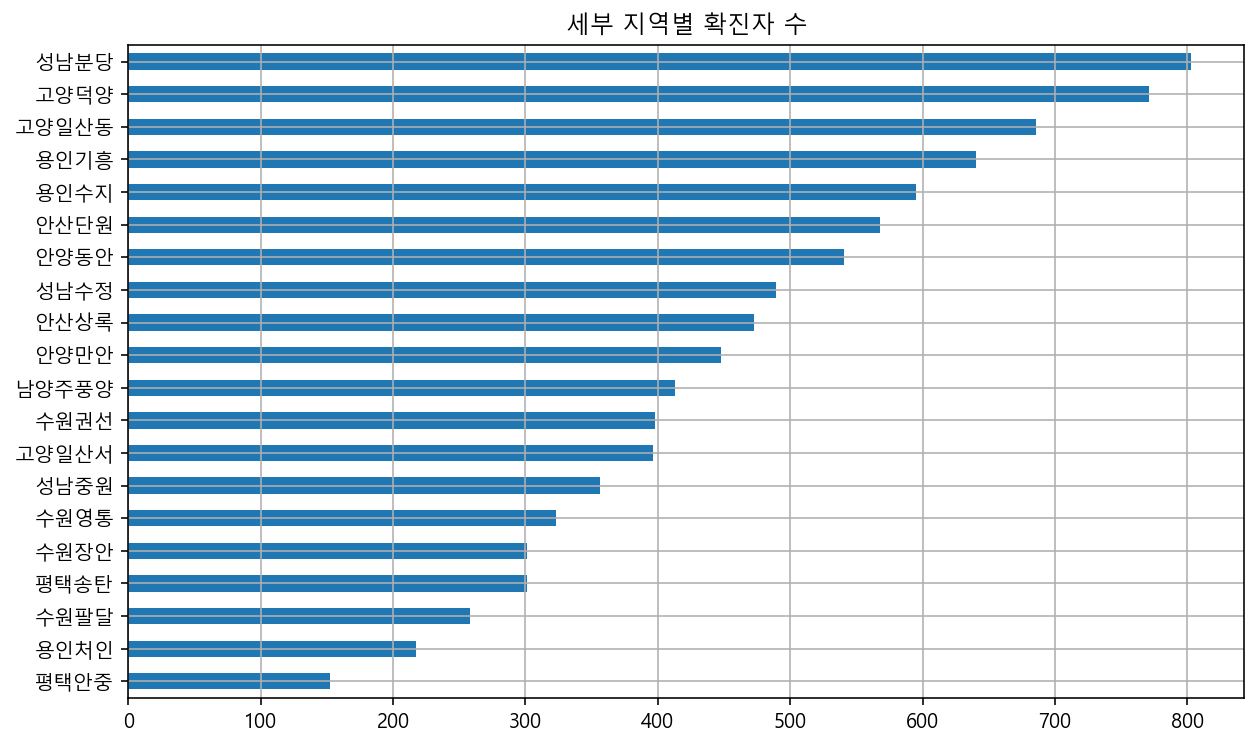

In [427]:
# 세부 지역별 확진자수 시각화
city_count_detail.sort_values().plot.barh(title = "세부 지역별 확진자 수", figsize = (10, 6), grid = True)

## 감염경로

In [393]:
# 감염경로 빈도수 확인
df["감염경로"].value_counts().sort_values()

천안세종_줌바        4
대구_신천지        15
과천_신천지        22
대구경북_일반       44
서울_콜센터        54
해외유입        1435
불명확        18762
Name: 감염경로, dtype: int64

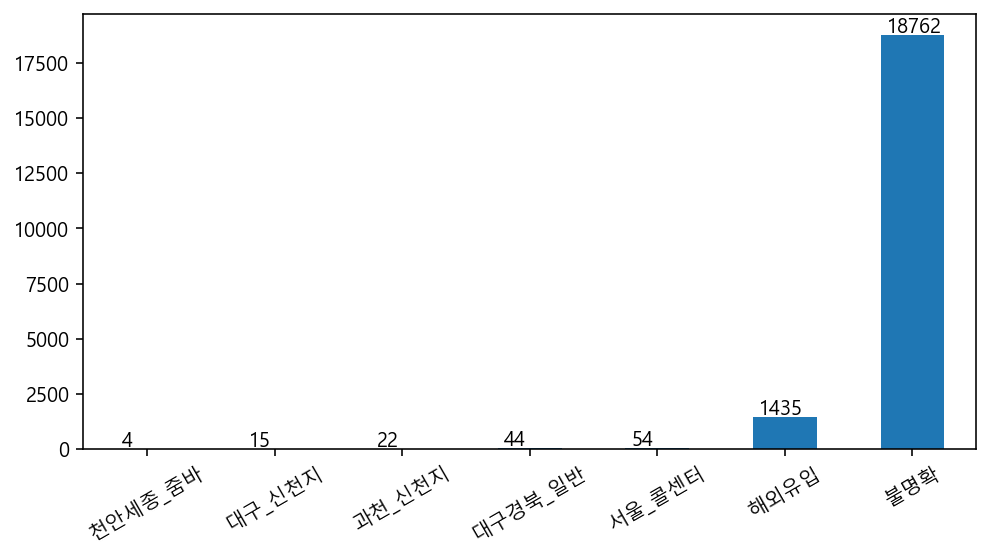

In [399]:
# 감염경로 빈도수 시각화 -> '불명확'이 압도적으로 많음
contact_count = df["감염경로"].value_counts().sort_values()
contact_count_top = contact_count.sort_values()
g = contact_count_top.plot.bar(figsize= (8, 4), rot=30)

# 확진자수 텍스트 표시
for i in range(len(contact_count)):
    g.text(x = i-0.2, y = contact_count.iloc[i]+100, s = contact_count.iloc[i])

In [400]:
# 감염경로, 월별 빈도수 확인
df.groupby(['감염경로', '월']).size().unstack().fillna(0).astype(int)

월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
감염경로,,,,,,,,,,,,,,
과천_신천지,0,11,11,0,0,0,0,0,0,0,0,0,0,0
대구_신천지,0,14,1,0,0,0,0,0,0,0,0,0,0,0
대구경북_일반,0,34,10,0,0,0,0,0,0,0,0,0,0,0
불명확,0,17,228,82,149,313,163,1678,996,914,1742,7161,4905,414
서울_콜센터,0,0,53,1,0,0,0,0,0,0,0,0,0,0
천안세종_줌바,0,0,4,0,0,0,0,0,0,0,0,0,0,0
해외유입,2,11,105,94,26,58,172,93,79,129,184,216,247,19


### 감염경로 불명

In [428]:
# 감염경로 '불명확'인 데이터만 보기
df_unknown = df[df["감염경로"]=="불명확"]
df_unknown

,성별,무증상/조사중,감염경로,구분,나이(만),연령대,재검출,지역,지역 (group),확진일-증상발현일,확진일자,월,일,주,요일
0,M,,불명확,NaN,52,50,,의정부,의정부,2,2021-02-04,2021-02,4,58,3
1,M,,불명확,NaN,78,70,,의정부,의정부,2,2021-02-04,2021-02,4,58,3
2,F,,불명확,NaN,52,50,,수원권선,수원,3,2021-02-04,2021-02,4,58,3
3,F,,불명확,NaN,64,60,,성남분당,성남,6,2021-02-04,2021-02,4,58,3
4,F,,불명확,NaN,54,50,,안산단원,안산,5,2021-02-04,2021-02,4,58,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20329,M,,불명확,primary,42,40,,동두천,동두천,7,2020-10-01,2020-10,1,40,3
20330,M,,불명확,접촉자,48,40,,용인수지,용인,0,2020-10-01,2020-10,1,40,3
20331,M,무증상,불명확,접촉자,72,70,,안양만안,안양,-,2020-10-01,2020-10,1,40,3
20332,M,,불명확,접촉자,16,10,,용인수지,용인,5,2020-10-01,2020-10,1,40,3


<AxesSubplot:xlabel='월,주'>

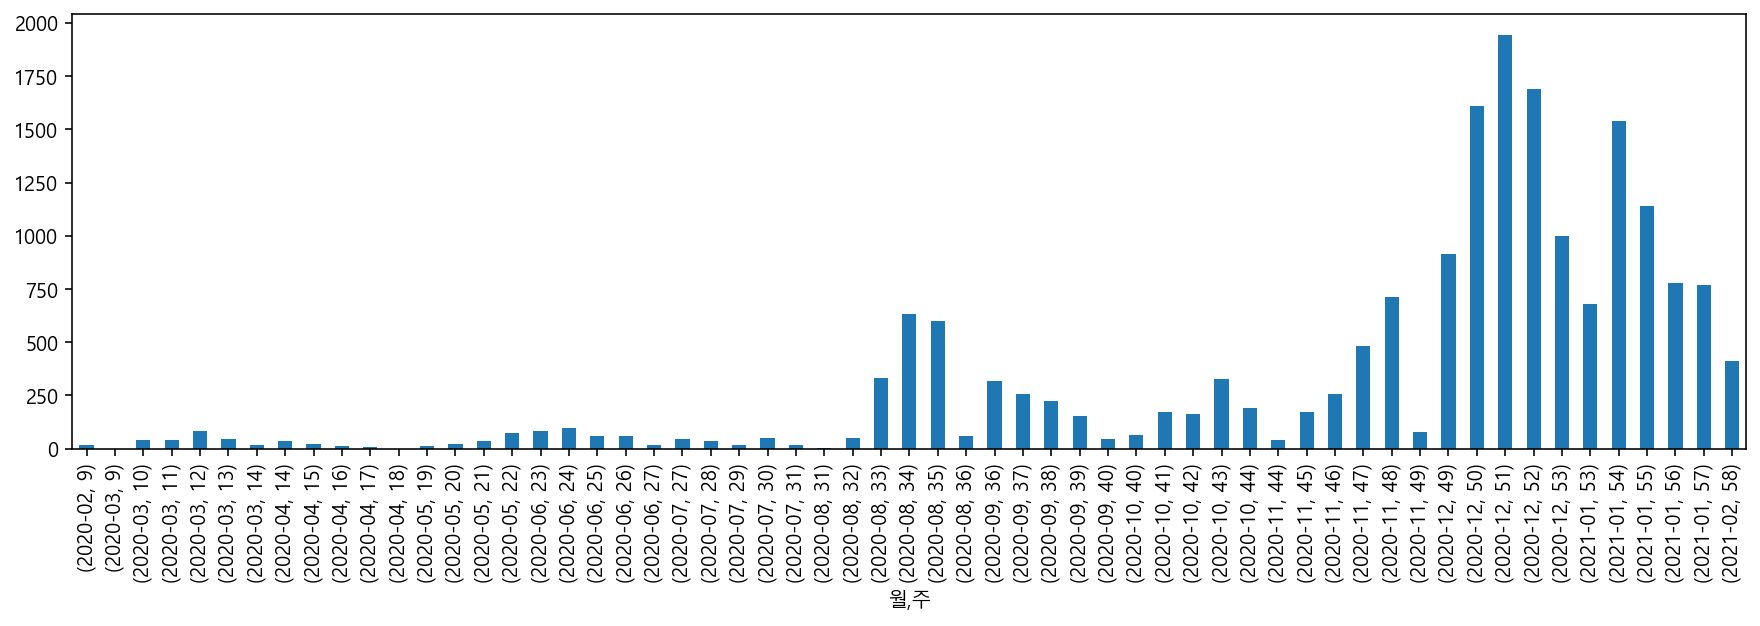

In [429]:
# 감염경로 불명 추세 확인
unknown_weekly_case = df_unknown.groupby(["월", "주"])["성별"].count()
unknown_weekly_case.plot.bar(figsize = (15,4))

In [430]:
# 전체 확진수 대비 감염경로 불명확 비율 확인
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진수"]
all_weekly_case.head()

,전체확진수
51,2014
53,1741
52,1734
50,1643
54,1623


In [431]:
unknown_weekly_case = df_unknown["주"].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진수"]
unknown_weekly_case.head()

,불명확진수
51,1945
52,1691
53,1680
50,1611
54,1537


In [440]:
# all_weekly_case 와 unknown_weekly_case 비교
unknown_case = all_weekly_case.merge(unknown_weekly_case, left_index = True, right_index = True)
unknown_case = unknown_case.sort_index()
unknown_case.head()

,전체확진수,불명확진수
9,58,18
10,62,39
11,78,39
12,122,85
13,113,45


<AxesSubplot:>

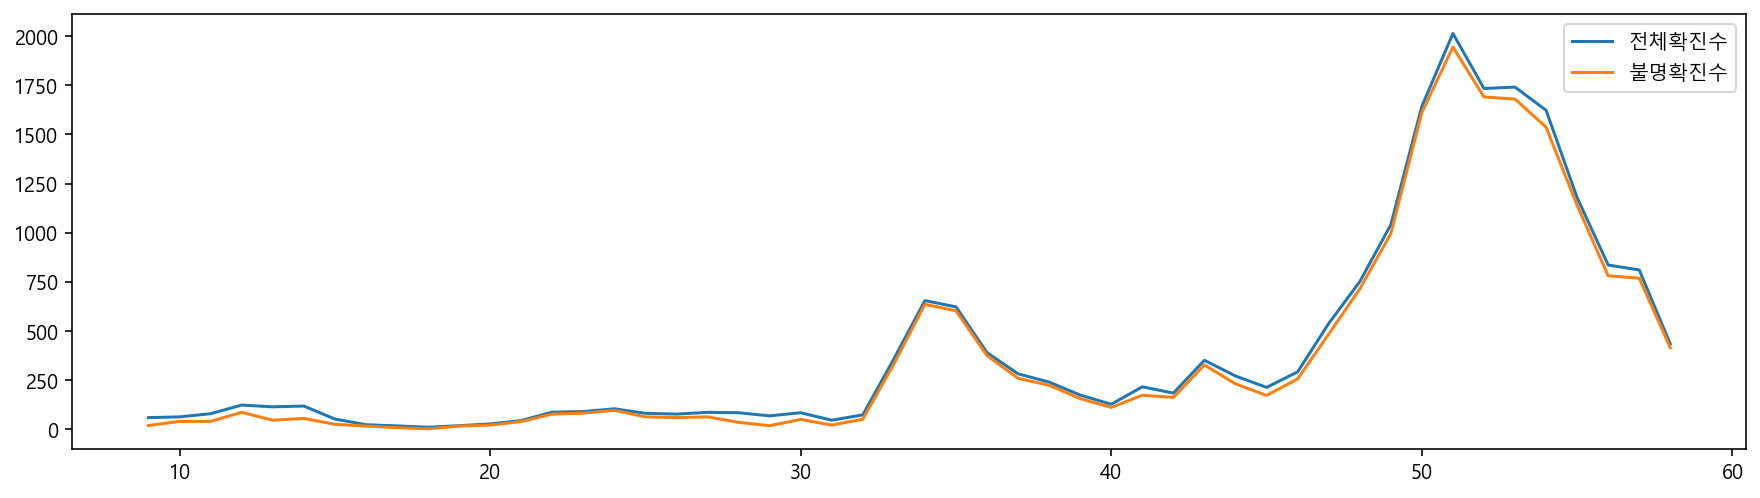

In [441]:
# 시각화 -> 상당수 확진자 감염경로 불명확인 것으로 확인
unknown_case.plot(figsize = (15, 4))